In [1]:
# Install everything
!python -m pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/1574/1
INFO:distributed.scheduler:  dashboard at:            localhost:8787
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-worker-space/worker-jb86h46x', purging
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/1574/4
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:38661
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/1574/1
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          4
INFO:distributed.worker:             

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.28.0.12:8787/status,
Dashboard: http://172.28.0.12:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: False
Comm: inproc://172.28.0.12/1574/1,Workers: 1
Dashboard: http://172.28.0.12:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://172.28.0.12/1574/4,Total threads: 4
Dashboard: http://172.28.0.12:38661/status,Memory: 1.86 GiB
Nanny: None,


In [3]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [4]:
X, y = make_classification(n_samples=1000, random_state=0)
df = X[:5]
print(df)

[[-1.06377997  0.67640868  1.06935647 -0.21758002  0.46021477 -0.39916689
  -0.07918751  1.20938491 -0.78531472 -0.17218611 -1.08535744 -0.99311895
   0.30693511  0.06405769 -1.0542328  -0.52749607 -0.0741832  -0.35562842
   1.05721416 -0.90259159]
 [ 0.0708476  -1.69528125  2.44944917 -0.5304942  -0.93296221  2.86520354
   2.43572851 -1.61850016  1.30071691  0.34840246  0.54493439  0.22532411
   0.60556322 -0.19210097 -0.06802699  0.9716812  -1.79204799  0.01708348
  -0.37566904 -0.62323644]
 [ 0.94028404 -0.49214582  0.67795602 -0.22775445  1.40175261  1.23165333
  -0.77746425  0.01561602  1.33171299  1.08477266 -0.97805157 -0.05012039
   0.94838552 -0.17342825 -0.47767184  0.76089649  1.00115812 -0.06946407
   1.35904607 -1.18958963]
 [-0.29951677  0.75988955  0.18280267 -1.55023271  0.33821802  0.36324148
  -2.10052547 -0.4380675  -0.16639343 -0.34083531  0.42435643  1.17872434
   2.8314804   0.14241375 -0.20281911  2.40571546  0.31330473  0.40435568
  -0.28754632 -2.8478034 ]
 [-2

In [5]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           cv=3,
                           n_jobs=-1)

In [6]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x7fdded8b01f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/joblib/_dask.py", line 80, in on_destroy
    del self._data[key]
KeyError: 140591150200464


In [7]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.655017,0.048081,0.091932,0.001374,0.001,rbf,True,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': True}",0.502994,0.501502,0.501502,0.501999,0.000704,41
1,0.648366,0.072582,0.090608,0.004904,0.001,rbf,False,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': False}",0.502994,0.501502,0.501502,0.501999,0.000704,41
2,0.490789,0.044229,0.038055,0.010205,0.001,poly,True,"{'C': 0.001, 'kernel': 'poly', 'shrinking': True}",0.502994,0.501502,0.501502,0.501999,0.000704,41
3,0.420599,0.009181,0.027800,0.005315,0.001,poly,False,"{'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...",0.502994,0.501502,0.501502,0.501999,0.000704,41
4,0.472032,0.020386,0.050640,0.008283,0.001,sigmoid,True,"{'C': 0.001, 'kernel': 'sigmoid', 'shrinking':...",0.502994,0.501502,0.501502,0.501999,0.000704,41


In [8]:
pd.DataFrame(grid_search.cv_results_).head()
grid_search.predict(X)[:5]
grid_search.score(X, y)

0.983

In [9]:
%matplotlib inline

In [10]:
!pip install dask-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [12]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   n_features=100,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

2023-03-20 12:41:02,513 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.39 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:41:02,613 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.32 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:41:02,943 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 1.55 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:41:02,946 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory lea

dask.array<concatenate, shape=(10000000, 100), dtype=float64, chunksize=(1000000, 100), chunktype=numpy.ndarray>

In [13]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

2023-03-20 12:41:08,813 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.31 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:41:08,913 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.32 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:41:09,013 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

INFO:distributed.core:Event loop was unresponsive in Scheduler for 31.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Worker for 31.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 22.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Worker for 30.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 7.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can

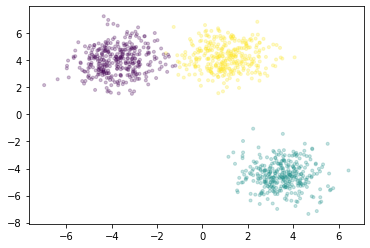

In [14]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

In [15]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='4GB')
client

/usr/local/lib/python3.9/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44005 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/1574/14
INFO:distributed.scheduler:  dashboard at:           localhost:44005
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/1574/17
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:35067
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/1574/14
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          4
INFO:distributed.worker:               Memory:                   3.73 GiB
INFO:distri

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.28.0.12:44005/status,
Dashboard: http://172.28.0.12:44005/status,Workers: 1
Total threads: 4,Total memory: 3.73 GiB
Status: running,Using processes: False
Comm: inproc://172.28.0.12/1574/14,Workers: 1
Dashboard: http://172.28.0.12:44005/status,Total threads: 4
Started: Just now,Total memory: 3.73 GiB
Comm: inproc://172.28.0.12/1574/17,Total threads: 4
Dashboard: http://172.28.0.12:35067/status,Memory: 3.73 GiB
Nanny: None,


In [16]:
X, y = dask_ml.datasets.make_blobs(n_samples=50000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=5)
X = X.persist()
X

dask.array<concatenate, shape=(50000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [17]:
km = dask_ml.cluster.KMeans(n_clusters=5, init_max_iter=2, oversampling_factor=10)
km.fit(X)

2023-03-20 12:59:28,657 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.32 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:59:28,767 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.32 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 12:59:28,929 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

KMeans(init_max_iter=2, n_clusters=5, oversampling_factor=10)

2023-03-20 13:00:59,877 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 13:00:59,965 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB
2023-03-20 13:01:00,078 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

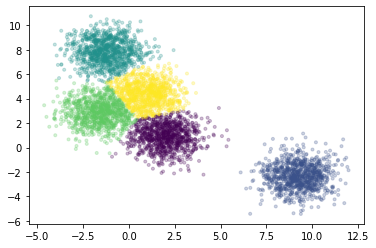

2023-03-20 13:01:07,215 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.34 GiB -- Worker memory limit: 1.86 GiB


In [18]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);